# Clean And Analyze Employee Exit Surveys

In this project, I'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The following questions will be answered:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Summary of res

## Reading in Date

The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In [3]:
# read in data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Exploring Data

### dete_survey:

In [4]:
# print info for primarily exploration
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

There are 822 entries in dete_survery. Part of the data is missing. Some columns contain only single digit number of data.

In [5]:
# print few entries for primarily exploration
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### tafe_survey:

In [6]:
# print info for primarily exploration
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

There are 702 entries in dete_survery. Part of the data is missing.

In [7]:
# print few entries for primarily exploration
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


At a glance, we can see that there are serveral problems we need to handle:
- Missing data
- Variation in the data format.
- Variation in the missing data format. (''Not Stated' in some columns, '-' in some columns)
- Mixing data type in single column
- Unnecessary columns
- Different column name with same content.
- Multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Cleaning Data

In [8]:
# read csv file with put "Not Stated' to na values
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. The CSV file was read into pandas again, but this time the 'Not Stated' values were read in as NaN to indicate that they are missing values.

Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis. Unrelated columns are deleted to keep the dataframe clean and readable.

In [9]:
# update column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.replace('\s+','')

# confirm update results
print(dete_survey_updated.head())

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
# replace columns names
re = {'Record ID': 'id', 
          'CESSATION YEAR': 'cease_date', 
          'Reason for ceasing employment': 'separationtype', 
          'Gender. What is your Gender?': 'gender',
          'CurrentAge. Current Age': 'age', 
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position', 
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 
          'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(re, axis = 'columns')
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Each dataframe contains many of the same columns, but the column names are different. The column names with same columns were updated in both dataframes to make sure no undesired outcome appear in later sessions.

### Extracting Resignation Data

In [11]:
# count values in separationtype in dete survey
dete_survey_updated['separationtype'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
# count values in separationtype in tafe survey
tafe_survey_updated['separationtype'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [13]:
# extract resignation data
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']
                                        .str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] =='Resignation'].copy()

For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'. In dete_survey_updated, there are multiple separation types with the string 'Resignation'. A new dataframe 'dete_resignations' has been generated to contains all the entries with the string 'Resignation' in separationtype columns. Also for tafe_survey_updated, A new dataframe 'tafe_resignation' has been generated to contains all the entries with the string 'Resignation' in separationtype columns.

### Examining start data and cease date

In [14]:
# explore cease date of dete survey
dete_resignations['cease_date'].value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [15]:
# extract cease year
dete_resignations['cease_year'] = dete_resignations['cease_date'].str[-4:].astype(float)

# confirm extract result
dete_resignations['cease_year'].value_counts().sort_index(ascending = False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

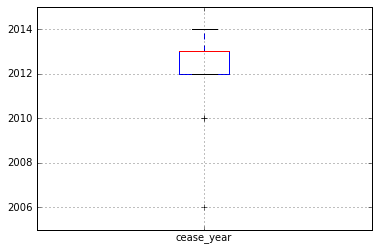

In [16]:
# create fig and ax for plots
fig, ax = plt.subplots()

# plot boxplot for cease year of dete survey
ax = dete_resignations.boxplot(column = ['cease_year']).set_ylim(2005, 2015)

In [17]:
# explore start date of dete survey
dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index(ascending = False)

 2013.0    10
 2012.0    21
 2011.0    24
 2010.0    17
 2009.0    13
 2008.0    22
 2007.0    21
 2006.0    13
 2005.0    15
 2004.0    14
 2003.0     6
 2002.0     6
 2001.0     3
 2000.0     9
 1999.0     8
 1998.0     6
 1997.0     5
 1996.0     6
 1995.0     4
 1994.0     6
 1993.0     5
 1992.0     6
 1991.0     4
 1990.0     5
 1989.0     4
 1988.0     4
 1987.0     1
 1986.0     3
 1985.0     3
 1984.0     1
 1983.0     2
 1982.0     1
 1980.0     5
 1977.0     1
 1976.0     2
 1975.0     1
 1974.0     2
 1973.0     1
 1972.0     1
 1971.0     1
 1963.0     1
NaN        28
Name: dete_start_date, dtype: int64

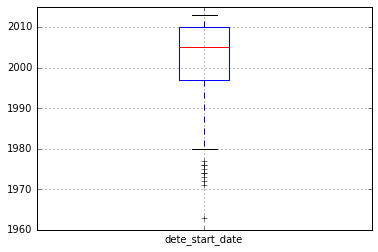

In [18]:
# plot boxplot for start date of dete data
ax = dete_resignations.boxplot(column = ['dete_start_date']).set_ylim(1960, 2015)

In [19]:
# explore cease date of tafe survey
tafe_resignations['cease_date'].value_counts(dropna = False).sort_index(ascending = False)

 2013.0     55
 2012.0     94
 2011.0    116
 2010.0     68
 2009.0      2
NaN          5
Name: cease_date, dtype: int64

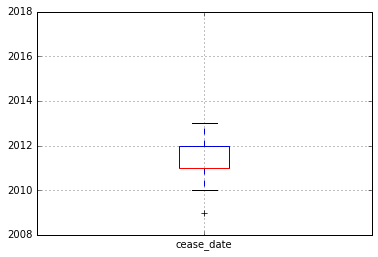

In [20]:
# plot boxplot for cease date of tafe data
ax = tafe_resignations.boxplot(column = ['cease_date']).set_ylim(2008, 2018)

For dete survey, the cease date range from 2006 to 2014 and the start date range from 1963 to 2013. Most of the cease date from dete survey is on 2012 and 2013, 50% of the start date from dete survey range from 1998 to 2010. 11 missing data are found in cease date and 28 data are missing in start date. For tafe survey, the cease data ranges from 2009 to 2013. 50% of the data are from 2011 to 2012. 5 data are missing.

No major abnormal data are found in start year and cease year in both dataframe. 

### Calculating years of service 

In [21]:
# calculate years of service by subtracting start year from cease year
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']

# count years of service 
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

To answer the question, we need to find out the year of service of the employees, which is calculated by Subtract the dete_start_date from the cease_date

### Identifing dissatisfied resigned employees

In [22]:
# count staff with dissatifaction in tafe survey
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
# count staff with Job Dissatifaction in tafe survey
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_vals(val):
    
    # define function to return true for staff who resigned with Dissatifaction
    
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

# return true when one of the two Dissatisfaction columns is True
factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction'] 
tafe_resignations['dissatisfied'] = tafe_resignations[factors].applymap(update_vals).any(axis = 1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [25]:
# return true when one of the Dissatisfaction columns is True
factors = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
           'physical_work_environment','lack_of_recognition' ,'lack_of_job_security',
           'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[factors].any(axis = 1, skipna = False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'] .value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

We used the values of several columns to determine if the employees resigned due to dissatisafaction. When one of the column is true. It passes the True value to the new column 'dissatisfied'. For tafe survey, 91 employees resigned due to dissatisfaction. For dete survey, 149 employees resigned due to dissatisfaction.

### Combining Data

In [26]:
#add institute to identify data
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

# combine two data sets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# sort null values in combined data set
combined.isnull().sum().sort_values()

id                                                       0
separationtype                                           0
institute                                                0
dissatisfied                                             8
cease_date                                              16
position                                                53
employment_status                                       54
age                                                     55
gender                                                  59
institute_service                                       88
WorkArea                                               311
Institute                                              311
Contributing Factors. Study                            319
Contributing Factors. Other                            319
Contributing Factors. NONE                             319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Job Dissatisfaction              3

In [27]:
# extract data with at least 500 non missing data
combined_updated = combined.dropna(thresh = 500, axis = 1)

# confirm result after extracting
combined_updated.isnull().sum().sort_values()

id                    0
institute             0
separationtype        0
dissatisfied          8
cease_date           16
position             53
employment_status    54
age                  55
gender               59
institute_service    88
dtype: int64

We combined two dataframe in order to aggregate the data. After combination, we found that there are some unnecessary columns. We decided to drop any columns with less than 500 non null values.

### Cleaning up the institute_service column

In [28]:
# count institute_service value
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [29]:
# extract number of institute_service year and convert to numeric 
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)', expand=True).astype('float')

# confrim result after extracting
combined_updated['institute_service'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [30]:
def group(year):
    
    # define function to group different years
    
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif year <= 6:
        return 'Experienced'
    elif year <= 10:
        return 'Established'
    elif year >= 11:
        return 'Veteran'

# apply grouping function
combined_updated['service_cat'] = combined_updated['institute_service'].apply(group)

# confirm grouping result
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

We believe that understanding employee's needs according to career stage instead of age is more effective. That's why the institute_service column has been cleaned up and the data has been categorized. The definitions are following:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

## Initial analysis

In [31]:
# count resigned staff with dissatisfaction
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
# fill missing data with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    411
True     240
Name: dissatisfied, dtype: int64

8 missing data have been replaced by the value False. The decision was made because of two reasons:
- The number of missing data contribute only 1% of the data. replacing thme would not cause major imput to the quality of the data.
- The majority value of this column is False, over 60%

In [33]:
# create pivot tabel for mean value of dissatisfied groups
pv_combined = combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat')
pv_combined

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


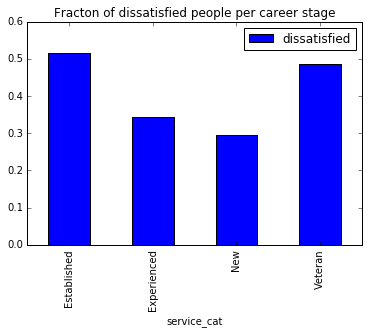

In [34]:
# plot bar chart for dissatisfied people per career stage group
pv_combined.plot(kind = 'bar', title='Fracton of dissatisfied people per career stage')

We can see from the above bar chart that the group with highest faction of dissatisfied people is 'Established', over 50% of them were dissatisfied when they left the company. The group with second highest ratio is Veteran, near 50% of them resigned with dissatisfied. Experienced and new employees had comparatively lower percentage of dissatisfaction, only 34% and 30%.

## Interim Conclusion

To answer the first questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

We can conclude that the ratio of employees who have been there longer resigning due to some kind of dissatisfaction is higher than that of employees who worked for a short period of time.